In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import tensorflow_datasets as tfds

In [0]:
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from skimage.transform import resize


In [0]:
### next stage: multiple pokemon
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png
!wget -nc https://lazyprogrammer.me/course_files/bulbasaur-tight.png
!wget -nc https://lazyprogrammer.me/course_files/squirtle-tight.png


--2019-11-19 10:51:50--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:30::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2019-11-19 10:51:50 (57.2 MB/s) - ‘charmander-tight.png’ saved [3952/3952]

--2019-11-19 10:51:51--  https://lazyprogrammer.me/course_files/bulbasaur-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:30::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3435 (3.4K) [image/png]
Saving to: ‘bulbasaur-tight.png’

bulbasaur-tight.png 100%[===================>]   3.35K  --.-KB/

In [0]:
!ls

bulbasaur-tight.png  charmander-tight.png  sample_data	squirtle-tight.png


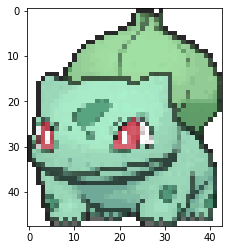

In [0]:
ch = imageio.imread('charmander-tight.png')
bb = imageio.imread('bulbasaur-tight.png')
sq = imageio.imread('squirtle-tight.png')
plt.imshow(bb)
plt.show()

In [0]:
POKE_DIM = 200
ch = np.array(ch)
bb = np.array(bb)
sq = np.array(sq)
CH_H, CH_W, CH_C = ch.shape
BB_H, BB_W, BB_C = bb.shape
SQ_H, SQ_W, SQ_C = sq.shape

#useful store these in an array
poke_data = [
       [ch, CH_H, CH_W , CH_C],
       [bb, BB_H, BB_W, BB_C],
       [sq, SQ_H, SQ_W, SQ_C],      
]
class_names = ['Charmander', 'Bulbasaur', 'Squirtle']

In [0]:
def custom_loss(y_true, y_pred):
  # target is a 8 - tuple 
  # (row, col, depth, width, class1, class2, class3, object_appeared)

  bce = binary_crossentropy(y_true[:, :4], y_pred[:, :4]) # location
  cce = categorical_crossentropy(y_true[:, 4:7], y_pred[:, 4:7]) #object class
  bce2 = binary_crossentropy(y_true[:, -1], y_pred[:, -1]) #object appeared

  return bce * y_true[:, -1] + cce * y_true[:, -1] + 0.5 * bce2

In [0]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape = [POKE_DIM, POKE_DIM, 3],
      include_top=False,
      weights='imagenet')
  x = Flatten()(vgg.output)
  x1 = Dense(4, activation='sigmoid')(x)    # location
  x2 = Dense(3, activation='softmax')(x)    # object class
  x3 = Dense(1, activation='sigmoid')(x)    # object appeared
  x = Concatenate()([x1, x2 , x3])
  model = Model(vgg.input, x)
  # model.compile(loss='custom_loss, optimizer=SGD(learning_rate = 0.01, momentum=0.9))
  model.compile(loss=custom_loss, optimizer=Adam(lr=0.0001))
  return model


In [0]:
!wget -nc https://lazyprogrammer.me/course_files/backgrounds.zip

--2019-11-19 10:52:11--  https://lazyprogrammer.me/course_files/backgrounds.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:30::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494000 (482K) [application/zip]
Saving to: ‘backgrounds.zip’

backgrounds.zip     100%[===================>] 482.42K  2.08MB/s    in 0.2s    

2019-11-19 10:52:12 (2.08 MB/s) - ‘backgrounds.zip’ saved [494000/494000]



In [0]:
!unzip -n backgrounds.zip

Archive:  backgrounds.zip
   creating: backgrounds/
  inflating: backgrounds/8.jpg       
   creating: __MACOSX/
   creating: __MACOSX/backgrounds/
  inflating: __MACOSX/backgrounds/._8.jpg  
  inflating: backgrounds/9.jpg       
  inflating: __MACOSX/backgrounds/._9.jpg  
  inflating: backgrounds/14.jpg      
  inflating: __MACOSX/backgrounds/._14.jpg  
  inflating: backgrounds/15.jpg      
  inflating: __MACOSX/backgrounds/._15.jpg  
  inflating: backgrounds/12.jpg      
  inflating: __MACOSX/backgrounds/._12.jpg  
  inflating: backgrounds/13.jpg      
  inflating: __MACOSX/backgrounds/._13.jpg  
  inflating: backgrounds/11.jpg      
  inflating: __MACOSX/backgrounds/._11.jpg  
  inflating: backgrounds/10.jpg      
  inflating: __MACOSX/backgrounds/._10.jpg  
  inflating: backgrounds/4.jpg       
  inflating: __MACOSX/backgrounds/._4.jpg  
  inflating: backgrounds/5.jpg       
  inflating: __MACOSX/backgrounds/._5.jpg  
  inflating: backgrounds/7.jpg       
  inflating: __MACOSX/back

In [0]:
from glob import glob
backgrounds = []

background_files = glob('backgrounds/*.jpg')
for f in background_files:
  # NOTE: they may not all be the same size
  bg = np.array(image.load_img(f))
  backgrounds.append(bg)

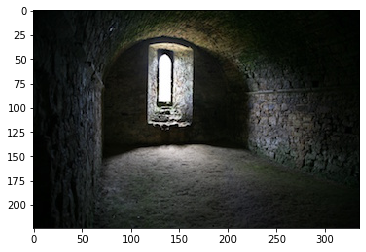

In [0]:
plt.imshow(backgrounds[4])

In [0]:
def pokemon_generator_multiclass(batch_size=64):
  #generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
      Y = np.zeros((batch_size, 8))

      for i in range(batch_size):
        #select a random background
        bg_idx = np.random.choice(len(backgrounds))
        bg = backgrounds[bg_idx]
        bg_h , bg_w, _ = bg.shape
        rnd_h = np.random.randint(bg_h - POKE_DIM)
        rnd_w = np.random.randint(bg_w - POKE_DIM)
        X[i] = bg[rnd_h:rnd_h+POKE_DIM, rnd_w:rnd_w+POKE_DIM].copy()

        # 25% no object, 25% + 25% + 25% for the 3 classes
        appear = (np.random.random() < 0.75)
        if appear:
          
          # choose a pokemon
          pk_idx = np.random.randint(3)
          pk, h, w , _ = poke_data[pk_idx]

          #resize object - make it bigger or smaller
          scale = 0.5 + np.random.random()
          new_height = int(scale * h)
          new_width = int(scale * w)
          obj = resize(
              pk,
              (new_height, new_width),
              preserve_range=True).astype(np.uint8)     #keep it from 0..255
          
          # may flip
          if np.random.random() < 0.5:
            obj = np.fliplr(obj)

          # choose a random location to store the object
          row0 = np.random.randint(POKE_DIM - new_height)
          col0 = np.random.randint(POKE_DIM - new_width)
          row1 = row0 + new_height
          col1 = col0 + new_width
          
          # can't 'just' assign obj to a slice of X
          # since the transparent parts will be black (0)
          mask = (obj[:,:,3] == 0)
          bg_slice = X[i, row0:row1, col0:col1, :]    # where we want to place 'obj'
          bg_slice = np.expand_dims(mask, -1) * bg_slice   # (h, w, 1) x (h, w, 3)
          bg_slice += obj[:,:,:3]             #'add' the pokemon to the slice
          X[i, row0:row1, col0:col1, :] = bg_slice
          
          #make targets

          # location
          Y[i, 0] = row0/POKE_DIM
          Y[i, 1] = col0/POKE_DIM
          Y[i, 2] = (row1 - row0)/POKE_DIM
          Y[i, 3] = (col1 - col0)/POKE_DIM

          # class
          Y[i, 4 + pk_idx] = 1

        # did the pokemon appear
        Y[i, 7] = appear

      yield X / 255., Y
          

In [0]:
xx = None
yy = None 
for x , y in pokemon_generator_multiclass():
  xx, yy = x, y
  break

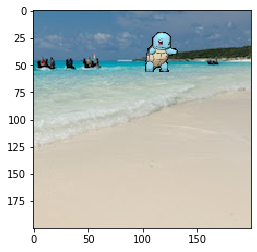

In [0]:
plt.imshow(xx[22])

In [0]:
n = yy.shape[0]
#idx = np.random.randint(n)

In [0]:
yy.shape[0]

64

[0.72  0.5   0.275 0.225 0.    0.    1.    1.   ]
percent no obj: 0.1875
percent charmander: 0.234375
percent bulbasaur: 0.3125
percent squirtle: 0.265625


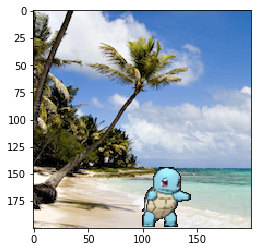

In [0]:
n = yy.shape[0]
idx = np.random.randint(n)
plt.imshow(xx[idx]);
print(yy[idx])
print("percent no obj:", (yy[:, 7] == 0).sum() / n)
print("percent charmander:", yy[:, 4].sum() / n)
print("percent bulbasaur:", yy[:, 5].sum() / n)
print("percent squirtle:", yy[:, 6].sum() / n) 

In [0]:
model = make_model()
model.fit_generator(
    pokemon_generator_multiclass(),
    steps_per_epoch = 50,
    epochs=5,
)

58892288/58889256 [==============================] - 2s 0us/step
Epoch 1/5
50/50 [==============================] - 5578s 112s/step - loss: 0.7823
Epoch 2/5
50/50 [==============================] - 5644s 113s/step - loss: 0.4209
Epoch 3/5
50/50 [==============================] - 5700s 114s/step - loss: 0.4182
Epoch 4/5
50/50 [==============================] - 5689s 114s/step - loss: 0.4067
Epoch 5/5
50/50 [==============================] - 5682s 114s/step - loss: 0.4150


In [0]:
#make predictinos
def pokemon_prediction_multiclass():
  #select a random background
  bg_idx = np.random.choice(len(backgrounds))
  bg = backgrounds[bg_idx]
  bg_h, bg_w, _ = bg.shape
  rnd_h = np.random.randint(bg_h - POKE_DIM)
  rnd_w = np.random.randint(bg_w - POKE_DIM)
  x = bg[rnd_h:rnd_h + POKE_DIM, rnd_w:rnd_w + POKE_DIM].copy()

  appear = (np.random.random() < 0.75)
  if appear:

    #choose a pokemon
    pk_idx = np.random.randint(3)
    pk, h, w, _ = poke_data[pk_idx]

    #resize charmanter - make it bigger or smaller
    scale = 0.5 + np.random.random()
    new_height = int(h * scale)
    new_width = int(w * scale)
    obj = resize(
        pk, 
        (new_height, new_width),
        preserve_range=True).astype(np.uint8) # Keep it from 0..255

    #maybe flip
    if np.random.random() < 0.5:
      obj = np.fliplr(obj)

    row0 =  np.random.randint(POKE_DIM - new_height)
    col0 = np.random.randint(POKE_DIM - new_width)
    row1 = row0 + new_height
    col1 = col0 + new_width

    # can't 'just' assign obj to a slice of x
    mask = (obj[:,:,3] == 0)
    bg_slice = x[row0:row1, col0:col1, :]
    bg_slice = np.expand_dims(mask,-1) * bg_slice
    bg_slice += obj[:,:,:3]
    x[row0:row1 , col0:col1, :] = bg_slice
    actual_class = class_names[pk_idx]
    print("true", row0, col0, row1, col1, actual_class)

    #Predict
    X = np.expand_dims(x, 0) / 255.
    p = model.predict(X)[0]

    #Plot 
    fig, ax = plt.subplots(1)
    ax.imshow(x.astype(np.uint8))

    #Draw the box
    if p[-1] > 0.5:
      row0 = int(p[0] * POKE_DIM)
      col1 = int(p[1] * POKE_DIM)
      row1 = int(row0 + p[2]*POKE_DIM)
      col1 = int(col0 + p[3]*POKE_DIM)
      class_pred_idx = np.argmax(p[4:7])
      class_pred = class_names[class_pred_idx]
      print("pred",row0, col0, row1, col1, class_pred)
      rect = Rectangle(
          (p[1] * POKE_DIM, p[0]*POKE_DIM),
          p[3] * POKE_DIM, p[2] * POKE_DIM, linewidth=1, edgecolor= 'r', facecolor='none')
      ax.add_patch(rect)
    else:
      print("pred: no obj")
    plt.show()  
      
    
      

    

true 13 59 80 119 Bulbasaur
pred 11 59 83 120 Bulbasaur


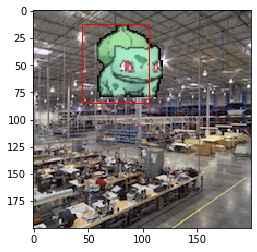

In [0]:
pokemon_prediction_multiclass()